# Proyek Analisis Data: Bike Sharing
- **Nama:** Bintang Raga Pratama
- **Email:** bintangraga152@gmail.com
- **ID Dicoding:** MS092D5Y0491

## Menentukan Pertanyaan Bisnis

* Kapan waktu paling sibuk untuk penyewaan sepeda (jam, hari, bulan)?
* Bagaimana pola penggunaan sepeda antara hari kerja dan akhir pekan?
* Seberapa besar pengaruh musim terhadap jumlah penyewaan sepeda?
* Siapa yang lebih sering menggunakan layanan: pengguna terdaftar atau pengguna
 casual?

## Import Semua Packages/Library yang Digunakan

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Wrangling

### Gathering Data

In [81]:
day=pd.read_csv('/content/Bike Dataset/day.csv')
hour=pd.read_csv('/content/Bike Dataset/hour.csv')

In [82]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


No problem

In [83]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


No problem

### Assessing Data

In [84]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


kita akan mengubah tipe data dteday menjadi time agar sesuai


In [85]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


kita akan mengubah tipe data dteday menjadi time agar sesuai

In [86]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


No problem

In [87]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


No problem

In [88]:
day.isna().sum()
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


seperti yang kita lihat tidak ada data null di kedua data

In [89]:
day.duplicated().sum()
hour.duplicated().sum()

0

seperti yang kita lihat tidak ada duplikasi di kedua datanya

In [90]:
print(day['season'].unique())
print(hour['season'].unique())

[1 2 3 4]
[1 2 3 4]


jumlah kolom dari kedua data jumlahnya sama

In [91]:
print(day['weathersit'].unique())
print(hour['weathersit'].unique())

[2 1 3]
[1 2 3 4]


jumlah kolom dari ke dua data jumlahnya berbeda,tapi ini tidak penting untuk analisi kita nanti


### Cleaning Data

In [92]:
drop_col =['windspeed']
day.drop(drop_col,axis=1,inplace=True)

 kita akan menghapus kolom yang tidak di gunakan,yaitu:
 instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.
 windspeed: Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda.


In [93]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [94]:
day['dteday']=pd.to_datetime(day['dteday'])
day['yr']=day['yr'].astype('object')
day['mnth']=day['mnth'].astype('object')
day['weekday']=day['weekday'].astype('object')
day['season']=day['season'].astype('object')
day['weathersit']=day['weathersit'].astype('object')
day['holiday']=day['holiday'].astype('object')
day['workingday']=day['workingday'].astype('object')

mengubah tipe data menjadi object

In [95]:
day.rename(columns={
    'dteday':'dateday',
    'yr':'year',
    'mnth':'month',
},inplace=True)
day.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


merubah detaail colom agar mudah di mengerti

In [96]:
day['month']=day['month'].map({
    1:'jan',
    2:'feb',
    3:'mar',
    4:'apr',
    5:'may',
    6:'jun',
    7:'jul',
    8:'aug',
    9:'sep',
    10:'oct',
    11:'nov',
    12:'dec'
})
day['month'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

memberikan keterangan pada setiap angka di columns

In [97]:
day['weekday']=day['weekday'].map({
   0:'sunday',
    1:'monday',
    2:'tuesday',
    3:'wednesday',
    4:'thursday',
    5:'friday',
    6:'saturday'
})
day['weekday'].unique()

array(['saturday', 'sunday', 'monday', 'tuesday', 'wednesday', 'thursday',
       'friday'], dtype=object)

memberikan keterangan pada setiap angka di columns

In [98]:
day['season']=day['season'].map({
    1:'spring',
    2:'summer',
    3:'fall',
    4:'winter'
})
day['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

memberikan keterangan pada setiap angka di columsn

In [99]:
day['weathersit']=day['weathersit'].map({
    1:'Clear/Partly Cloudy',
    2:'Misty/Cloudy',
    3:'Light Snow/Rain',
    4:'Severe Weather'
})
day['weathersit'].unique()

array(['Misty/Cloudy', 'Clear/Partly Cloudy', 'Light Snow/Rain'],
      dtype=object)

memberikan keterangan pada setiap angka di columsn

In [100]:
day['holiday']=day['holiday'].map({
    0:'Hari Biasa',
    1:'Hari Libur'
})
day['holiday'].unique()

array(['Hari Biasa', 'Hari Libur'], dtype=object)

memberikan keterangan pada setiap angka di columsn

## Exploratory Data Analysis (EDA)

### Explore ...

1.mengelompokan penyewa sepeda berdasarkan bulan

In [117]:
day.groupby(by='month').agg({
    'cnt':['max','min','mean','sum']
})

cnt                           
        max   min         mean     sum
month                                 
apr    7460   795  4484.900000  269094
aug    7865  1115  5664.419355  351194
dec    6606   441  3403.806452  211036
feb    5062  1005  2655.298246  151352
jan    4521   431  2176.338710  134933
jul    8173  3285  5563.677419  344948
jun    8120  3767  5772.366667  346342
mar    8362   605  3692.258065  228920
may    8294  2633  5349.774194  331686
nov    6852  1495  4247.183333  254831
oct    8156    22  5199.225806  322352
sep    8714  1842  5766.516667  345991

Kesimpulan:

dapat di sumpulkan bahwa yang memiliki data terbesar adalah bulan september.sedangkan jumlah terkecil adalah bulan januari

2.mengelompokan penyewa sepeda berdasarkan hari libur

In [106]:
day.groupby(by="holiday").agg({
    'cnt':['max','min','mean','sum']
})

cnt                            
             max   min         mean      sum
holiday                                     
Hari Biasa  8714    22  4527.104225  3214244
Hari Libur  7403  1000  3735.000000    78435

berdasarkan kode di atas dapat di simpulkan bahwa peminjaman sepeda lebih tinggi di hari biasa daripada hari libur

3.membandingkan peyewaan sepeda setiap jam

In [107]:
hour.groupby(by='hr').agg({
    'cnt':['max','min','mean','sum']
})

cnt                        
    max min        mean     sum
hr                             
0   283   2   53.898072   39130
1   168   1   33.375691   24164
2   132   1   22.869930   16352
3    79   1   11.727403    8174
4    28   1    6.352941    4428
5    66   1   19.889819   14261
6   213   1   76.044138   55132
7   596   1  212.064649  154171
8   839   5  359.011004  261001
9   426  14  219.309491  159438
10  539   8  173.668501  126257
11  663  10  208.143054  151320
12  776   3  253.315934  184414
13  760  11  253.661180  184919
14  750  12  240.949246  175652
15  750   7  251.233196  183149
16  783  11  311.983562  227748
17  976  15  461.452055  336860
18  977  23  425.510989  309772
19  743  11  311.523352  226789
20  567  11  226.030220  164550
21  584   6  172.314560  125445
22  502   9  131.335165   95612
23  256   2   87.831044   63941

simpulan:

penyewaan tertinggi terjadi pada pukul 17.00 dan 18.00
ini menunjukan bahwa sepeda banyak di sewa saat jam pulang kerja atau sekolah
penyewaan terendah terjadi pada pukul 4.00
ini wajar karena masih terlalu pagi orang orang masih tidur

4.Bandingkan penyewa sepeda pada saat hari kerja (weekday) vs akhir pekan (weekend)

In [119]:
day.groupby(by='weekday').agg({
    'cnt':['max','min','mean','sum']
})

cnt                           
            max   min         mean     sum
weekday                                   
friday     8362  1167  4690.288462  487790
monday     7525    22  4338.123810  455503
saturday   8714   627  4550.542857  477807
sunday     8227   605  4228.828571  444027
thursday   7804   431  4667.259615  485395
tuesday    7767   683  4510.663462  469109
wednesday  8173   441  4548.538462  473048

kesimpulan:

hari paling banyak peminjam adalah saturday

5.Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan season

In [123]:
day.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
fall    1202.611702  4441.691489  8714  1115  5644.303191
spring   334.928177  2269.204420  7836   431  2604.132597
summer  1106.097826  3886.233696  8362   795  4992.331522
winter   729.112360  3999.050562  8555    22  4728.162921

Kesimpulan:

penguna sepeda lebih banyak menyewa sepeda pada saat musim gugur (Fall) dan paling sedikit musim semi(spring)

6.kolompok paling banyan melakukan peminjaman sepeda

In [124]:
day.groupby(by='casual').agg({
    'cnt':['max','min']
})

cnt      
         max   min
casual            
2         22    22
9        683   441
15       431   431
25      1162  1162
34       506   506
...      ...   ...
3155    7836  7836
3160    8714  8714
3252    6857  6857
3283    6591  6591
3410    8294  8294

[606 rows x 2 columns]

In [125]:
day.groupby(by='registered').agg({
    'cnt':['max','min','mean','sum']
})

cnt                    
             max   min    mean   sum
registered                          
20            22    22    22.0    22
416          431   431   431.0   431
432          441   441   441.0   441
451          754   754   754.0   754
472          506   506   506.0   506
...          ...   ...     ...   ...
6844        7572  7572  7572.0  7572
6898        7693  7693  7693.0  7693
6911        7691  7691  7691.0  7691
6917        8167  8167  8167.0  8167
6946        7733  7733  7733.0  7733

[679 rows x 4 columns]

kesimpulan:

max casual: 8714
max registered: 8167
dari data dia atas pengguna casual lebih banyak dari penguna registered

7.mengelompokan penyewa sepeda berdasarkan season


In [118]:
day.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
fall    1202.611702  4441.691489  8714  1115  5644.303191
spring   334.928177  2269.204420  7836   431  2604.132597
summer  1106.097826  3886.233696  8362   795  4992.331522
winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil analisis diatas, para penyewa sepeda baik Casual Dan Registered, suka sekali pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

8.pengaruh musim,hari kerja,dan pengguna terdaftar/casual terhadap penyewaan


In [126]:
multivariate_rentals = day[['season', 'workingday', 'casual', 'registered', 'cnt']].groupby(['season', 'workingday']).sum()
multivariate_rentals


casual  registered     cnt
season workingday                            
fall   0           107345      204711  312056
       1           118746      630327  749073
spring 0            32400      105283  137683
       1            28222      305443  333665
summer 0           105693      182283  287976
       1            97829      532784  630613
winter 0            71294      191260  262554
       1            58488      520571  579059

kesimpulan:

* Musim yang Paling Populer untuk Penyewaan Sepeda: Musim gugur dan musim panas memiliki jumlah penyewaan tertinggi, dengan jumlah penyewaan yang lebih besar pada hari biasa dan libur.

* Penyewaan Lebih Tinggi pada Hari Biasa: Secara umum, penyewaan sepeda lebih tinggi pada hari biasa (working days) di hampir semua musim, kecuali musim dingin yang lebih seimbang antara hari biasa dan libur.

* Pengaruh Musim terhadap Penyewaan: Musim semi dan musim dingin menunjukkan penurunan dalam jumlah penyewaan sepeda, dengan musim dingin memiliki jumlah penyewaan yang paling rendah.




## Visualization & Explanatory Analysis


### 1.Kapan waktu paling sibuk untuk penyewaan sepeda (jam, hari, bulan)?

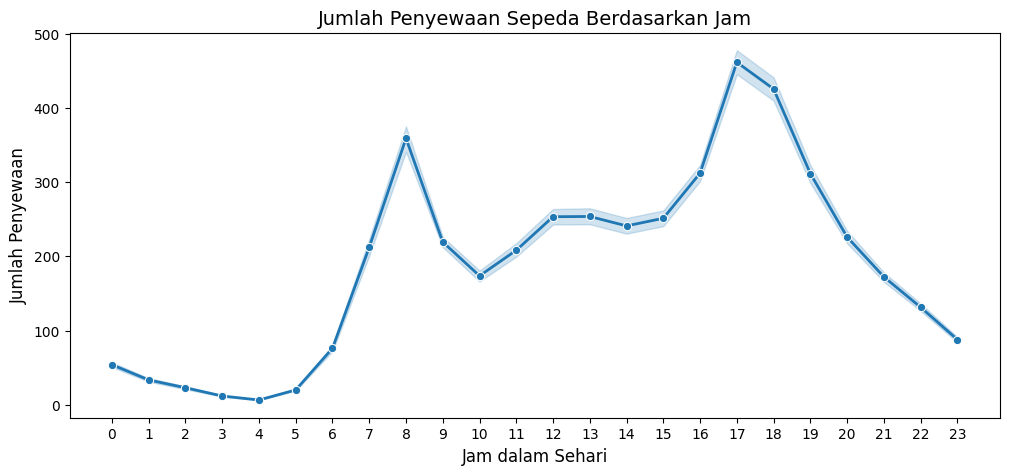

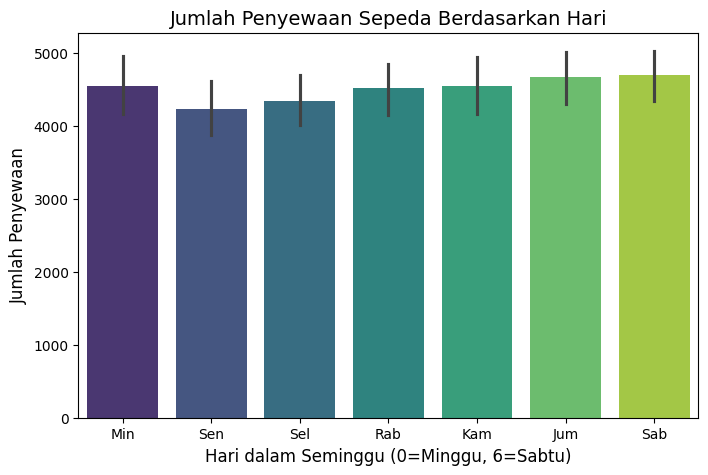

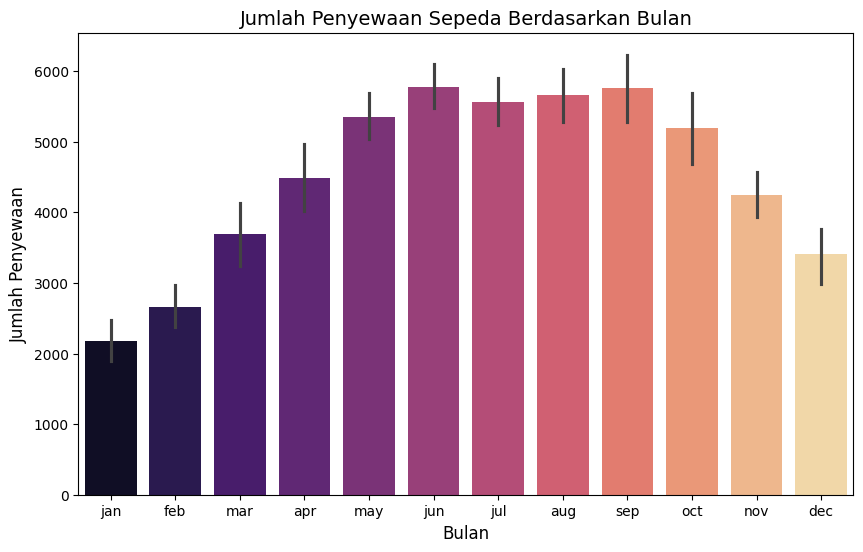

In [113]:
# 1. Visualisasi Penyewaan Berdasarkan Jam
plt.figure(figsize=(12, 5))
sns.lineplot(x=hour['hr'], y=hour['cnt'], marker="o", linewidth=2)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Jam", fontsize=14)
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

# 2. Visualisasi Penyewaan Berdasarkan Hari
plt.figure(figsize=(8, 5))
sns.barplot(x=day['weekday'], y=day['cnt'], hue=day['weekday'], palette="viridis", legend=False)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Hari", fontsize=14)
plt.xlabel("Hari dalam Seminggu (0=Minggu, 6=Sabtu)", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(ticks=range(7), labels=['Min','Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab'])
plt.show()

# 3. Visualisasi Penyewaan Berdasarkan Bulan
plt.figure(figsize=(10, 6))
sns.barplot(x=day['month'], y=day['cnt'], hue=day['month'], palette="magma", legend=False)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Bulan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.show()


kesimpulan :

Mayoritas Penyewa sepeda paling sibuk jam 5 sore dan paling sepi jam 4 pagi

Penyewaan lebih tinggi di hari biasa dibandingkan hari libur, menunjukkan banyaknya pengguna reguler seperti pekerja dan pelajar.

Jumlah penyewa berdasarkan bulan paling tinggi di juni-september

### 2.Bagaimana pola penggunaan sepeda antara hari kerja dan akhir pekan?

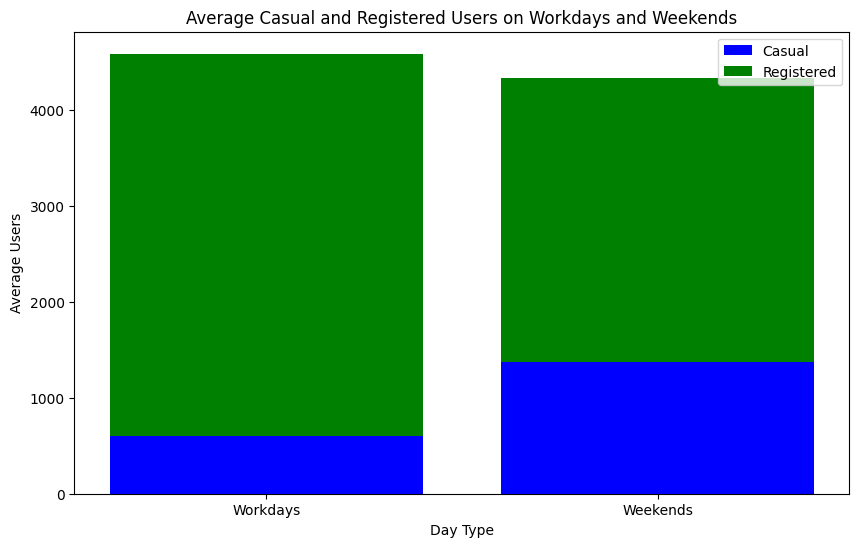

In [114]:
workdays = day[day['workingday'] == 1]
weekends = day[day['workingday'] == 0]

plt.figure(figsize=(10, 6))
plt.bar(
    ['Workdays', 'Weekends'],
    [workdays['casual'].mean(), weekends['casual'].mean()],
    color='blue',
    label='Casual'
)

plt.bar(
    ['Workdays', 'Weekends'],
    [workdays['registered'].mean(), weekends['registered'].mean()],
    bottom=[workdays['casual'].mean(), weekends['casual'].mean()],
    color='green',
    label='Registered'
)

plt.xlabel('Day Type')
plt.ylabel('Average Users')
plt.title('Average Casual and Registered Users on Workdays and Weekends')
plt.legend()
plt.show()


kesimpulan:

Penguna registered lebih banyak di hari libur maupun hari kerja

### 3.Seberapa besar pengaruh musim terhadap jumlah penyewaan sepeda?

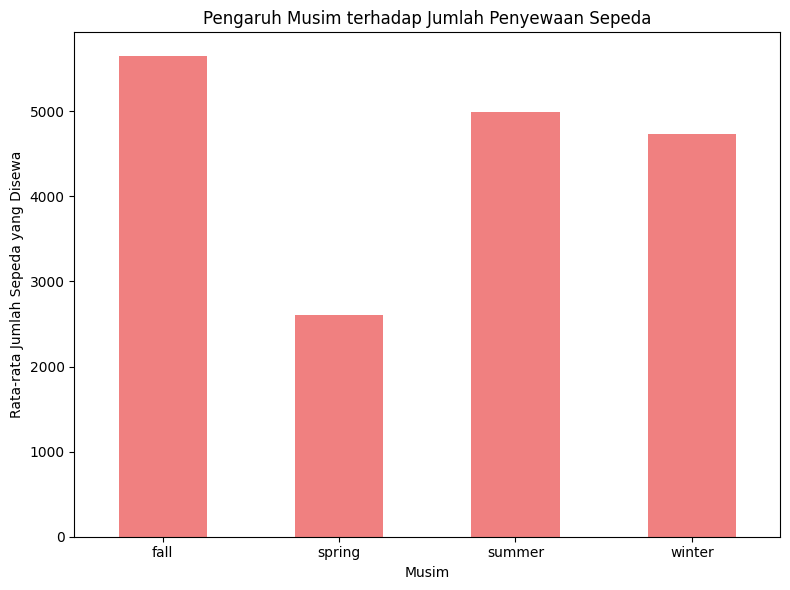

In [115]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata jumlah sepeda yang disewa
usage_by_season = day.groupby('season')['cnt'].mean()

plt.figure(figsize=(8, 6))
usage_by_season.plot(kind='bar', color='lightcoral')
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.xlabel('Musim')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Kesimpulan :

**Musim gugur (Fall) dan musim panas (Summer) memiliki jumlah penyewaan tertinggi:**
* Pada kedua musim ini, jumlah penyewaan sepeda mencapai angka tertinggi, baik untuk pengguna casual maupun terdaftar.
Cuaca yang lebih stabil dan kondisi yang lebih nyaman untuk bersepeda dapat menjadi faktor utama.

**Musim dingin (Winter) memiliki jumlah penyewaan yang cukup tinggi:**
* tetapi lebih rendah dibandingkan Fall dan Summer.
Meskipun suhu lebih dingin, penyewaan tetap tinggi terutama dari pengguna terdaftar yang kemungkinan menggunakan sepeda untuk keperluan sehari-hari.

**Musim semi (Spring) memiliki jumlah penyewaan terendah:**
* Penyewaan sepeda di musim ini lebih sedikit dibandingkan musim lainnya, kemungkinan karena cuaca yang lebih tidak menentu dan seringnya hujan, sehingga mengurangi minat bersepeda.

### 4.Siapa yang lebih sering menggunakan layanan: pengguna terdaftar atau pengguna casual?

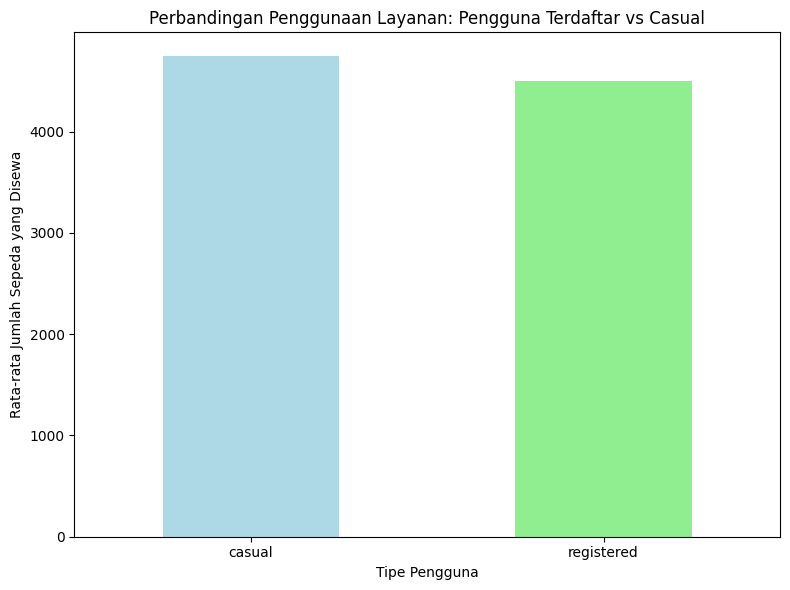

In [116]:
if 'user_type' not in day.columns:
    day['user_type'] = ['casual' if c >= r else 'registered' for c, r in zip(day['casual'], day['registered'])]

usage_by_user_type = day.groupby('user_type')['cnt'].mean()

plt.figure(figsize=(8, 6))
usage_by_user_type.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Perbandingan Penggunaan Layanan: Pengguna Terdaftar vs Casual')
plt.ylabel('Rata-rata Jumlah Sepeda yang Disewa')
plt.xlabel('Tipe Pengguna')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Kesimpulan:

Penguna Casual Lebih Sering Megunakan pelayanan daripada registered

## Analisis Lanjutan (Opsional)

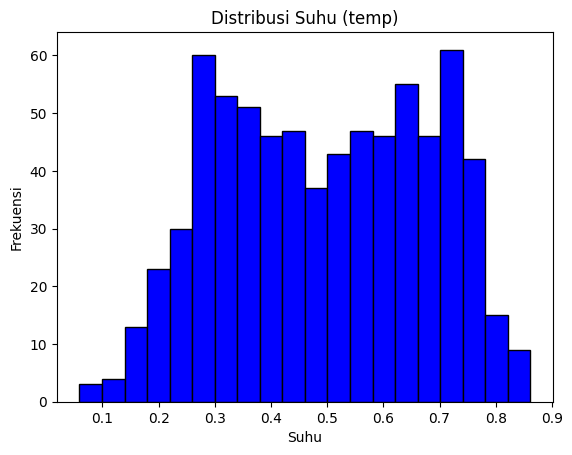

In [142]:
plt.hist(day['temp'], bins=20, color='blue', edgecolor='black')
plt.title('Distribusi Suhu (temp)')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.show()


1.binning suhu

In [143]:
bins = [0, 0.3, 0.6, 1]
labels = ['Dingin', 'Sedang', 'Panas']
day['temp_binned'] = pd.cut(day['temp'], bins=bins, labels=labels, right=True)
print(day[['temp', 'temp_binned']].head())
print(day['temp_binned'].isna().sum())

       temp temp_binned
0  0.344167      Sedang
1  0.363478      Sedang
2  0.196364      Dingin
3  0.200000      Dingin
4  0.226957      Dingin
0


Rentang Bin:
* Dingin: Suhu antara 0.1 hingga 0.3
* Sedang: Suhu antara 0.3 hingga 0.6
* Panas: Suhu antara 0.6 hingga 1.0


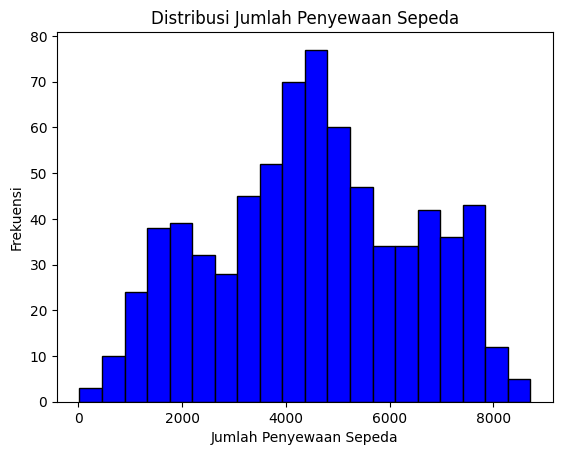

In [145]:
# Plot histogram for 'cnt' (jumlah penyewaan sepeda)
plt.hist(day['cnt'], bins=20, color='blue', edgecolor='black')
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.show()

2.Binning pada Kolom cnt (Jumlah Penyewaan Sepeda):

In [150]:
binst_cnt=[0,2000,4000,6000,8000]
labels_cnt=['rendah','sedang','tinggi','sangat tinggi ']
day['cnt_binned']=pd.cut(day['cnt'],bins=binst_cnt,labels=labels_cnt,right=True)
print(day[['cnt','cnt_binned']].head())

    cnt cnt_binned
0   985     rendah
1   801     rendah
2  1349     rendah
3  1562     rendah
4  1600     rendah


Rentang Bin:
* 0-2000: Label 'rendah'
* 2000-4000: Label 'sedang'
* 4000-6000: Label 'tinggi'
* 6000-8000: Label 'sangat tinggi'

3.Binning pada colom month

In [157]:
month_map = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Salin data bulan ke kolom sementara
day['month_temp'] = day['month'].map(month_map)
bins_month = [0, 3, 6, 9, 12]
labels_month = ['Q1', 'Q2', 'Q3', 'Q4']

day['month_binned'] = pd.cut(day['month_temp'], bins=bins_month, labels=labels_month, right=True)

print(day[['month', 'month_temp', 'month_binned']].head())


  month  month_temp month_binned
0   jan           1           Q1
1   jan           1           Q1
2   jan           1           Q1
3   jan           1           Q1
4   jan           1           Q1


Rentang Binning:

* Q1 (Quarter 1) mencakup bulan Januari, Februari, dan Maret (angka 1-3).
* Q2 (Quarter 2) mencakup bulan April, Mei, dan Juni (angka 4-6).
* Q3 (Quarter 3) mencakup bulan Juli, Agustus, dan September (angka 7-9).
* Q4 (Quarter 4) mencakup bulan Oktober, November, dan Desember (angka 10-12).



## Conclusion

* Berdasarkan analisis data penyewaan sepeda, dapat disimpulkan beberapa hal penting terkait pola penggunaan sepeda. Pertama, jam sibuk penyewaan terjadi pada pukul 17.00 dan 18.00, yang kemungkinan besar disebabkan oleh aktivitas pulang kerja atau sekolah. Sebaliknya, jam sepi terjadi pada pukul 04.00. Hari Sabtu mencatatkan jumlah penyewaan tertinggi, sementara bulan September menunjukkan angka penyewaan paling banyak.

* Pola penggunaan sepeda juga bervariasi antara hari kerja dan akhir pekan. Meskipun jumlah pengguna terdaftar lebih banyak pada kedua tipe hari tersebut, perbedaan signifikan terlihat antara keduanya.

* Selain itu, musim berperan penting dalam jumlah penyewaan. Musim dingin dan gugur menunjukkan angka penyewaan tertinggi, kemungkinan karena cuaca yang lebih stabil. Musim panas mencatatkan angka sedikit lebih rendah, dan musim semi memiliki angka terendah, kemungkinan disebabkan oleh cuaca yang tidak menentu.

* Terakhir, pengguna casual secara rata-rata lebih sering menggunakan layanan dibandingkan pengguna terdaftar. Temuan ini memberikan wawasan penting bagi bisnis penyewaan sepeda untuk mengoptimalkan strategi pemasaran dan operasional mereka, seperti menambah armada pada jam-jam sibuk dan lokasi tertentu, serta menawarkan promo khusus di musim-musim tertentu.